# Story - 4 : How much do we get paid?

#### Instructions
I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

##### Notes:
- You will need to identify reliable sources for salary data and assemble the data sets that you will need.
- Your visualization(s) must show the most salient information (variation in average salary by role and by state).
- For this Story you must use a code library and code that you have written in R, Python or Java Script (additional coding in other languages is allowed).
- Post generation enhancements to you generated visualization will be allowed (e.g. Addition of kickers and labels).

### Start of Work

In [1]:
import pandas as pd
import requests
import re
import viz_lib as vl
import matplotlib.pyplot as plt


C:\Users\johnf\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
## Firstly, im reading in the data. There were several State by State breakdowns for avg salaries from Zip recruiter.
## I used AI to extract teh data tables to start this visualizations. 

In [3]:
## Creating a dictionary of titles and URLS with Data 
data_dict = {"data_analyst":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Analyst-Salary-by-State",
        "local_file":"./data/data_analyst_salary_by_state_2025.csv"},
    "data_scientist":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-DATA-Scientist-Salary-by-State",
        "local_file":"./data/data_scientist_salary_by_state_2025.csv"},
    "data_engineer":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-BIG-DATA-Engineer-Salary-by-State",
        "local_file":"./data/data_engineer_salary_by_state_2025.csv"},
    "lead_data_architect":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Lead-DATA-Architect-Salary-by-State",
        "local_file":"./data/lead_data_architect_by_state_2025.csv"},
    "data_manager":{
        "source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Manager-Salary-by-State",
        "local_file":"./data/data_manager_by_state_2025.csv"},
    "data_editor":{"source_url":"https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Editor-Salary-by-State",
        "local_file":"./data/data_editor_by_state_2025.csv"}
            }

In [4]:
data_df_list =[]
for key, val in data_dict.items():
    print(key)
    df = pd.read_csv(val["local_file"])
    if key == 'data_engineer':
        lim_df= df[["state","annual_salary_usd"]]        
    elif key in ['data_manager',"data_editor"]:
        lim_df = df[["State","Annual Salary (USD)"]]
        lim_df = lim_df.rename(columns={"State":"state","Annual Salary (USD)":"annual_salary_usd"})
    else:
        ## Kepping core columns for analysis
        lim_df = df[["state","state_abbr","annual_salary_usd"]]
    lim_df = lim_df.rename(columns={"annual_salary_usd":f"{key}_salary"})
    data_df_list.append(lim_df)

data_analyst
data_scientist
data_engineer
lead_data_architect
data_manager
data_editor


In [5]:
## Formatting Text before merge. 
for i, df in enumerate(data_df_list):
    df["state"] = df["state"].astype(str).str.strip().str.upper()
## Putting it all in one df
all_data=data_df_list[0].merge(
    data_df_list[1], how='left', on=["state","state_abbr"]).merge(
    data_df_list[2],how='left',on=["state"]).merge(
    data_df_list[3],how='left', on=["state","state_abbr"]).merge(
    data_df_list[4],how='left',on=["state"]).merge(
    data_df_list[5],how='left',on=["state"])

#### Viz 1

In [7]:
role_cols = {
    "data_analyst_salary": "Data Analyst",
    "data_scientist_salary": "Data Scientist",
    "data_engineer_salary": "Data Engineer",
    "lead_data_architect_salary": "Lead Data Architect",
    'data_manager_salary':"Data Manager",
    "data_editor_salary":"Data Editor"
}

for c in role_cols:
    all_data[c] = pd.to_numeric(all_data[c], errors="coerce")

viz1_df = pd.DataFrame([(label, all_data[col].min(), all_data[col].max()) for col, label in role_cols.items()],
                       columns=["position", "min_pay", "max_pay"]).sort_values("max_pay", ascending=False).reset_index(drop=True)
viz1_df

,position,min_pay,max_pay
0,Lead Data Architect,108935,165101
1,Data Engineer,97896,148371
2,Data Scientist,91721,139013
3,Data Manager,72595,110026
4,Data Analyst,61756,93598
5,Data Editor,44695,67739


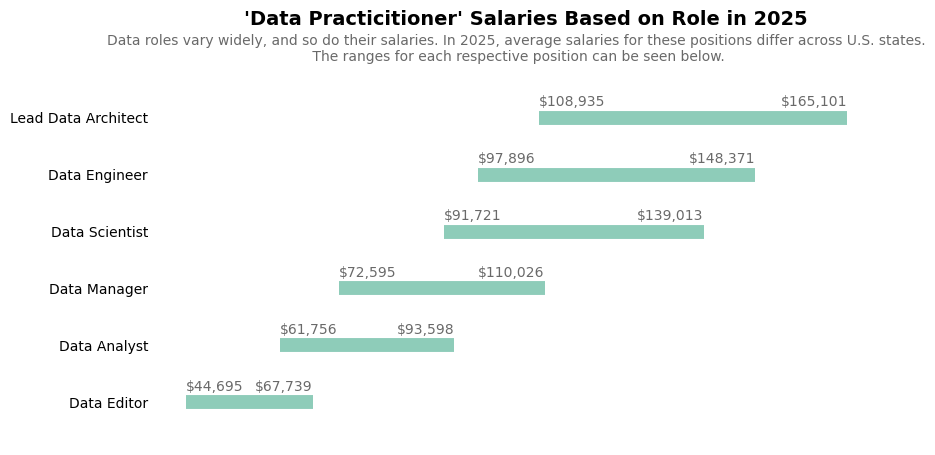

In [8]:
ax = vl.make_span_chart(
    viz1_df,
    category="position",
    x_min="min_pay",
    x_max="max_pay",
    title="'Data Practicitioner' Salaries Based on Role in 2025", # Data Practicitioner 
    subtitle="Data roles vary widely, and so do their salaries. In 2025, average salaries for these positions differ across U.S. states.\n The ranges for each respective position can be seen below.",
    color="#43AA8B",
    use_suptitle=True,          
    subtitle_on_axes=True,      
    title_x=0.59,               
    title_y=0.90,               
    top_adjust=0.82,            
    tight_rect=(0, 0, 1, 0.95), 
    x_lab="",
    x_axis_show=False,
    y_ticks_show=False,
    grid=False,
    figsize=(9, 5)
)
plt.show()


In [10]:
## Viz2 - By State regardless of position (All Positions)
state_based_df_list = []

for i, r in all_data.iterrows():
    state = r['state']
    salaries = [
        r["data_analyst_salary"],
        r["data_scientist_salary"],
        r["data_engineer_salary"],
        r["lead_data_architect_salary"],
        r["data_manager_salary"],
        r["data_editor_salary"],
    ]
    min_sal = min(salaries)
    max_sal = max(salaries)
    
    temp_df = pd.DataFrame([{
        "state": state,
        "min_salary": min_sal,
        "max_salary": max_sal
    }])
    state_based_df_list.append(temp_df)

viz_2 = pd.concat(state_based_df_list)


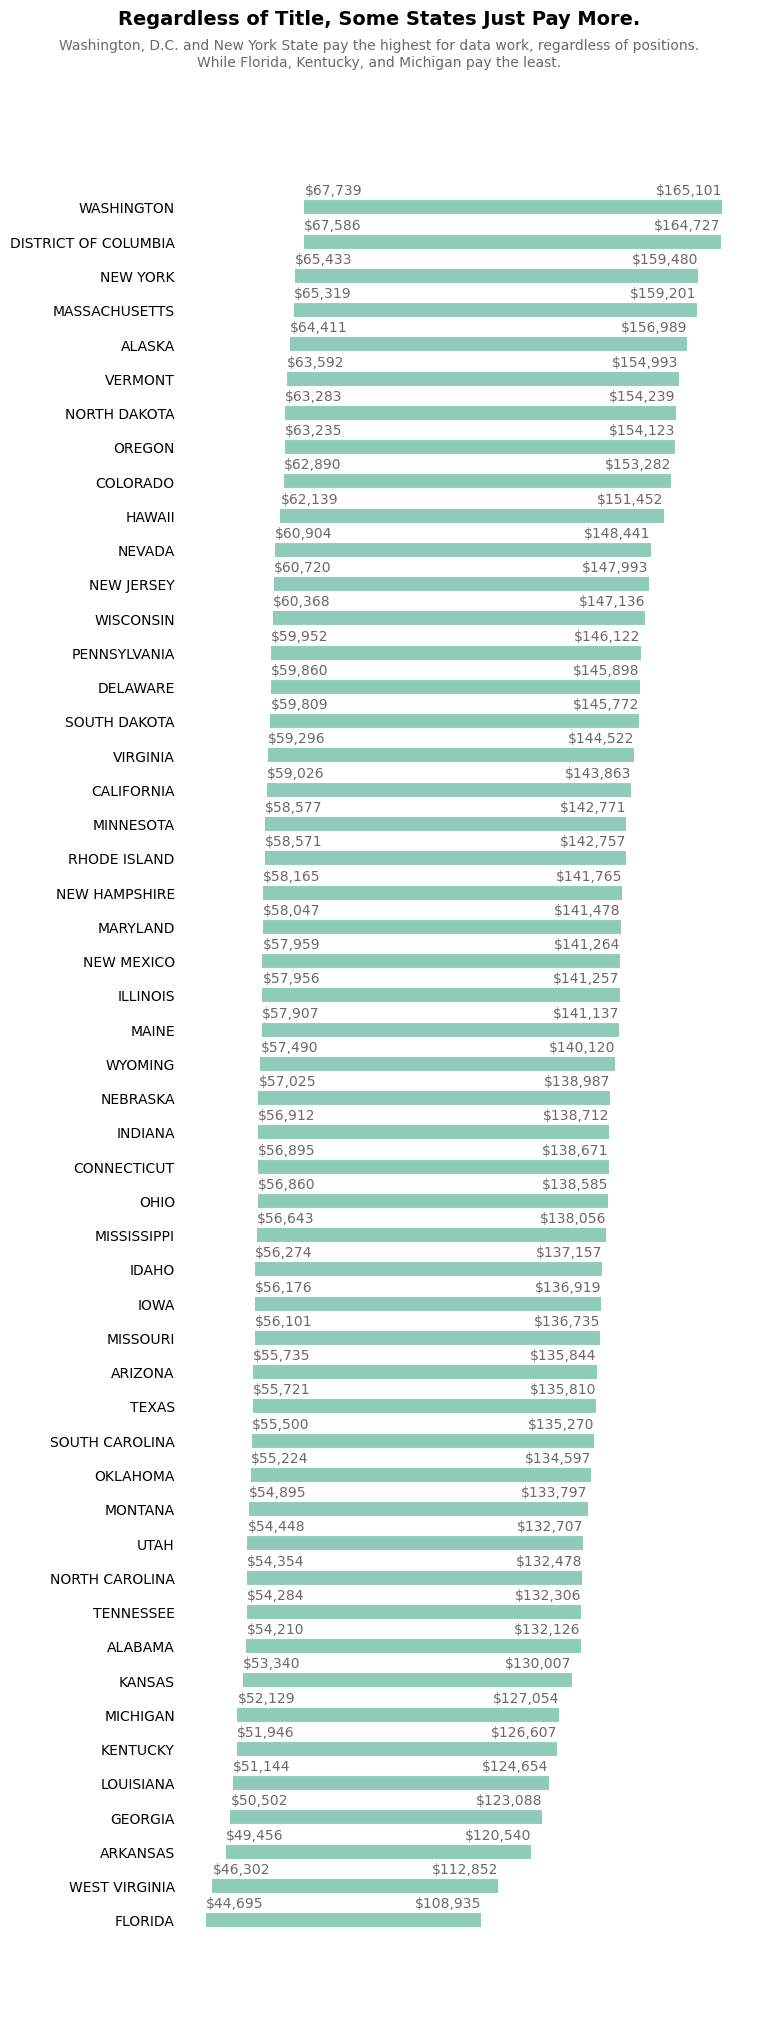

In [11]:
ax = vl.make_span_chart(
    viz_2,
    category="state",
    x_min="min_salary",
    x_max="max_salary",
    title="Regardless of Title, Some States Just Pay More.",
    subtitle=("Washington, D.C. and New York State pay the highest for data work, "
              "regardless of positions.\nWhile Florida, Kentucky, and Michigan pay the least."),
    color="#43AA8B",
    x_axis_show=False, y_ticks_show=False, grid=False,
    figsize=(8, 21),
    annotated_labels_placement_pad=0.28,
    use_suptitle=True,
    subtitle_on_axes=False,
    title_y=0.986,
    subtitle_y=0.972,
    top_adjust=0.965,
    tight_rect=(0.02, 0.02, 0.98, 0.964)
)
ax.margins(y=0.06)
plt.show()


In [12]:
import pandas as pd

# If you want the *true* average across all 6 roles, use the underlying all_data:
salary_cols = [
    "data_analyst_salary",
    "data_scientist_salary",
    "data_engineer_salary",
    "lead_data_architect_salary",
    "data_manager_salary",
    "data_editor_salary",
]

# Compute avg per state from all_data and merge into viz_2
state_avg = (
    all_data[["state"] + salary_cols]
    .assign(avg_salary=lambda d: d[salary_cols].mean(axis=1))
    [["state", "avg_salary"]]
)

viz_2 = viz_2.merge(state_avg, on="state", how="left")

# Pay gap between highest and lowest role in that state
viz_2["pay_gap"] = viz_2["max_salary"] - viz_2["min_salary"]

# For nicer labels, convert to thousands
viz_2["avg_salary_k"] = viz_2["avg_salary"] / 1000
viz_2["pay_gap_k"] = viz_2["pay_gap"] / 1000

# viz_2.head()


C:\Users\johnf\Documents\Github\CUNY_SPS_WORK\FALL2025\DATA608\Story4\viz_lib.py:248: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.0, 0.0, 0.86, title_y - 0.01])


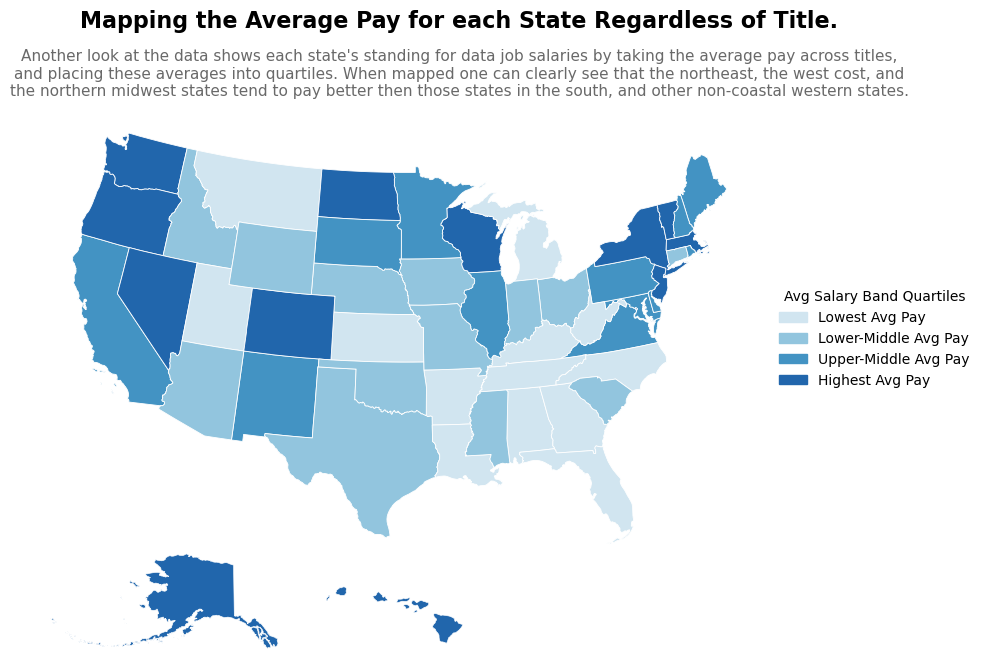

In [13]:
## Map – Average salary across all data titles, by state

# Bin into 4 quantile-based bands
viz_2["avg_pay_band"] = pd.qcut(
    viz_2["avg_salary_k"],
    q=4,
    labels=["Lowest Avg Pay", "Lower-Middle Avg Pay", "Upper-Middle Avg Pay", "Highest Avg Pay"]
).astype(str)  

avg_pay_colors = {
    "Lowest Avg Pay":  "#d1e5f0",
    "Lower-Middle Avg Pay":    "#92c5de",
    "Upper-Middle Avg Pay":    "#4393c3",
    "Highest Avg Pay": "#2166ac",
}

fig, axes = vl.make_state_map_insets(
    viz_2,
    state_col="state",
    category_col="avg_pay_band",
    colors=avg_pay_colors,
    title="Mapping the Average Pay for each State Regardless of Title.",
    subtitle=(
        "Another look at the data shows each state's standing for data job salaries by taking the average pay across titles,\n"
        "and placing these averages into quartiles. When mapped one can clearly see that the northeast, the west cost, and\n"
        "the northern midwest states tend to pay better then those states in the south, and other non-coastal western states."
    ),
    legend_title="Avg Salary Band Quartiles",
    title_y=1.02,        
    subtitle_pad=30,
    figsize=(10, 7)
)


C:\Users\johnf\Documents\Github\CUNY_SPS_WORK\FALL2025\DATA608\Story4\viz_lib.py:248: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.0, 0.0, 0.86, title_y - 0.01])


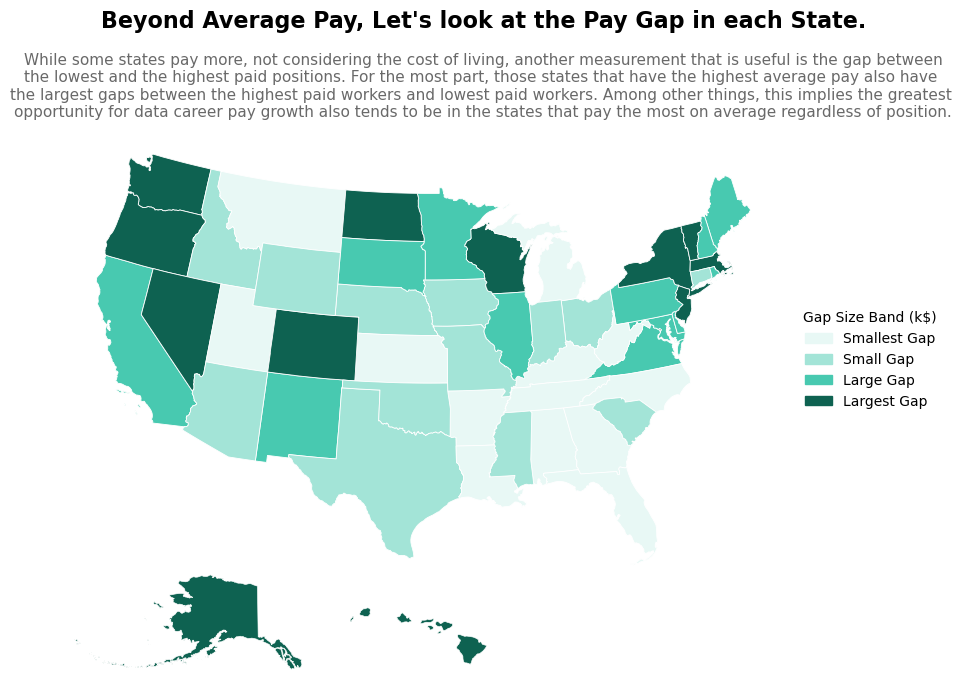

In [20]:
## Map – Pay gap between highest and lowest data role

viz_2["gap_band"] = pd.qcut(
    viz_2["pay_gap_k"],
    q=4,
    labels=["Smallest Gap", "Small Gap", "Large Gap", "Largest Gap"]
).astype(str)   # <--- important change

gap_colors = {
    "Smallest Gap": "#e8f8f5",
    "Small Gap":    "#a3e4d7",
    "Large Gap":    "#48c9b0",
    "Largest Gap":  "#0e6251",
}

fig, axes = vl.make_state_map_insets(
    viz_2,
    state_col="state",
    category_col="gap_band",
    colors=gap_colors,
    title="Beyond Average Pay, Let's look at the Pay Gap in each State.",
    subtitle=(
        "While some states pay more, not considering the cost of living, another measurement that is useful is the gap between\n"
        "the lowest and the highest paid positions. For the most part, those states that have the highest average pay also have \n"
        "the largest gaps between the highest paid workers and lowest paid workers. Among other things, this implies the greatest \n"
        "opportunity for data career pay growth also tends to be in the states that pay the most on average regardless of position."
    ),
    legend_title="Gap Size Band (k$)",
    title_y=1.05,        
    subtitle_pad=30,
    figsize=(10, 7)
)
